<a href="https://colab.research.google.com/github/Tanmay-jam/Pytorch-Digit-Classifier/blob/main/Handwritten_Digits_Classifier_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

**Loading Data**

The dataset is not normalized and hence mean and standard deviation of data is 0.1307 and 0.3081

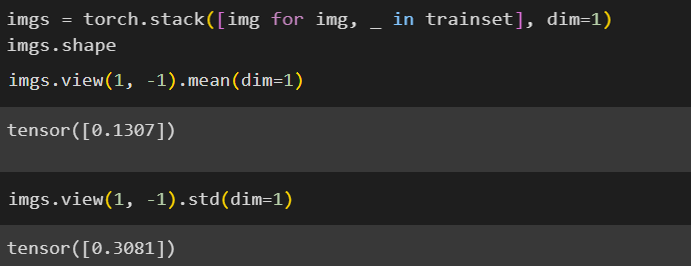

While loading data we apply transforms.

1. convert images to tensor
2. Normalize dataset with mean=0.1307 and standar deviation=0.3081

Normalization helps to get pixel values to optimal range and better comparison of values.

Data is loaded into training set and testing set differently with batch size of 64. Getting data in batches makes training faster.


In [ ]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307), (0.3081))
                               ])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
traindataloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testdataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 87875058.38it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31521127.72it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28849029.92it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3858725.70it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Each batch contains 64 grayscale images with 28 by 28 pixels.

**Visualizing data**

In [ ]:
## This cell contains a function for showing 5 images from a dataloader##
def show5(imgdataloader):
    dataiter = iter(imgdataloader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


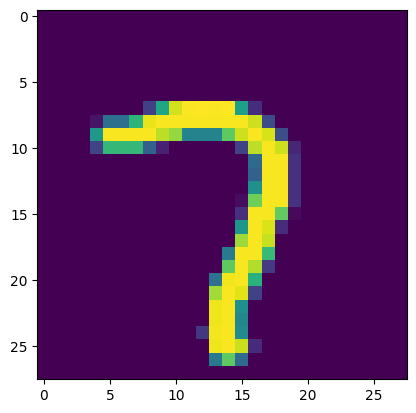

2


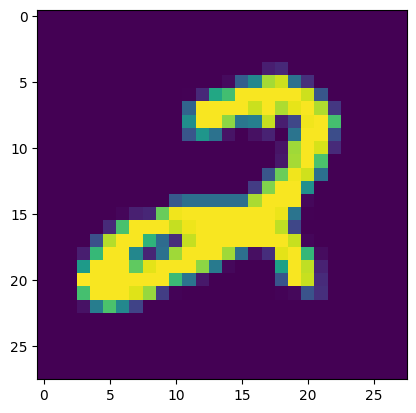

0


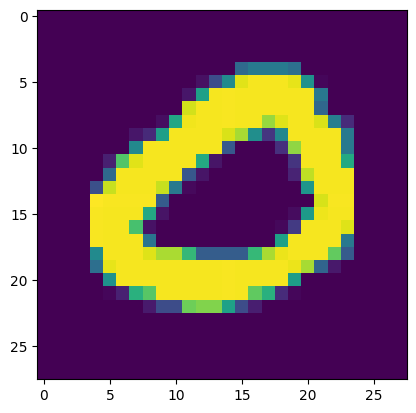

1


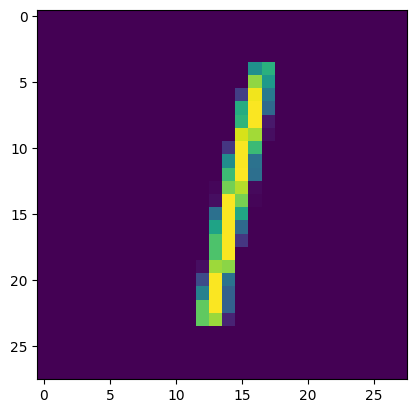

7


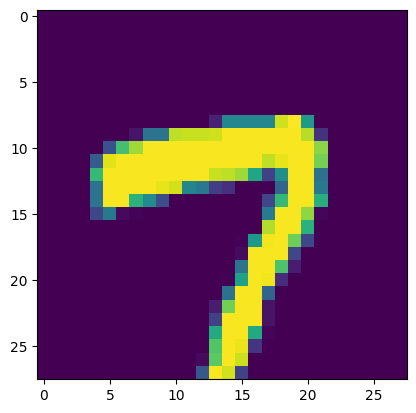

In [ ]:
# Explore data
show5(traindataloader)

**Building Model**

In [ ]:
#Base Model
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 144)
        self.output = nn.Linear(144, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        return x

In [ ]:
#model instansiation
model = Network()

#defining loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
#Training
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)

average loss in 0  epoch:  2129.0100486278534
average loss in 1  epoch:  1971.6015065908432
average loss in 2  epoch:  1474.242264509201
average loss in 3  epoch:  1003.3990989923477
average loss in 4  epoch:  754.3095051050186
average loss in 5  epoch:  609.0221012234688
average loss in 6  epoch:  519.9611622393131
average loss in 7  epoch:  463.0048558115959
average loss in 8  epoch:  423.76492370665073
average loss in 9  epoch:  394.8622563779354


In [ ]:
#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


Total images in test:  10000
Accuracy of the model on 10000 test images:  88.97


**Improve Model**

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.output(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


average loss in 0  epoch:  1227.9580155611038
average loss in 1  epoch:  543.9421864449978
average loss in 2  epoch:  414.34070874750614
average loss in 3  epoch:  362.2431325465441
average loss in 4  epoch:  332.9767911732197
average loss in 5  epoch:  313.183053471148
average loss in 6  epoch:  298.65434750169516
average loss in 7  epoch:  287.1069648936391
average loss in 8  epoch:  277.2834868133068
average loss in 9  epoch:  268.80497793853283
Total images in test:  10000
Accuracy of the model on 10000 test images:  92.19


Removing second hidden layer causes increase in acuuracy from 88.97% to 92.19%

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


average loss in 0  epoch:  540.8967307209969
average loss in 1  epoch:  299.3748975172639
average loss in 2  epoch:  258.7210967466235
average loss in 3  epoch:  232.093293517828
average loss in 4  epoch:  210.71368922293186
average loss in 5  epoch:  192.92756181955338
average loss in 6  epoch:  177.59334887564182
average loss in 7  epoch:  164.63717629387975
average loss in 8  epoch:  152.9615431819111
average loss in 9  epoch:  143.05574953183532
Total images in test:  10000
Accuracy of the model on 10000 test images:  95.52


Replacing sigmoid activation function with tanh increses accuracy on test data from 92.19% to 95.52%

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.logsoftmax = nn.LogSoftmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training
avg_loss = list()
for epoch in range(15):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print('Accuracy of the model on 10000 test images: ', 100*correct/total)


average loss in 0  epoch:  543.3471489846706
average loss in 1  epoch:  302.00986448675394
average loss in 2  epoch:  260.79849964380264
average loss in 3  epoch:  234.0234716013074
average loss in 4  epoch:  212.8185269497335
average loss in 5  epoch:  195.0216837283224
average loss in 6  epoch:  179.80883722007275
average loss in 7  epoch:  166.4777315929532
average loss in 8  epoch:  154.85307179391384
average loss in 9  epoch:  144.80576051957905
average loss in 10  epoch:  135.85136522352695
average loss in 11  epoch:  127.85635523498058
average loss in 12  epoch:  120.68164266832173
average loss in 13  epoch:  114.35700754076242
average loss in 14  epoch:  108.3674047626555
Total images in test:  10000
Accuracy of the model on 10000 test images:  96.5


Increasing number of epochs to 15 increases accuracy on test data from 95.52% to 96.5%

**Save the Model**

In [ ]:
torch.save(model.state_dict(), 'Digitclassifier.pth')